In [1]:
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
import numpy as np

# torch.cuda.is_available()
torch.backends.mps.is_available()

True

# Getting familiar with the environment

Now we are going to use the MountainCar env
Which is a little bit more complicated that Taxi because it has a continuous state (observation) space

In [29]:
env = gym.make('MountainCar-v0', render_mode='rgb_array', max_episode_steps=10_000)
print(f"""
Action space size: {env.action_space.n}.
    0 -> Accelerate to the left 
    1 -> Do nothing
    2 -> Accelerate to the right
""")
print(f'Observation space (states): {env.observation_space}') 
print(f"Env's horizon (maximum episode length limit): {env.spec.max_episode_steps}")
print(f'State (position, speed) extends from {env.observation_space.low} to {env.observation_space.high}')


Action space size: 3.
    0 -> Accelerate to the left 
    1 -> Do nothing
    2 -> Accelerate to the right

Observation space (states): Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Env's horizon (maximum episode length limit): 10000
State (position, speed) extends from [-1.2  -0.07] to [0.6  0.07]


In [12]:
def plot_frame(frame):
    plt.imshow(frame)
    plt.axis('off')
    plt.show()


    For rewards:
        -1 -> if position < 0.5
    Episode ends (terminated) when position >= 0.5
    Episode is `truncated` if the steps surpass the horizon of the env
        



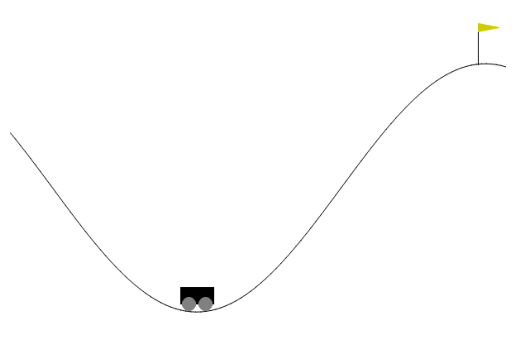

In [30]:
obs, info = env.reset()
frame = env.render() 

print(
    """
    For rewards:
        -1 -> if position < 0.5
    Episode ends (terminated) when position >= 0.5
    Episode is `truncated` if the steps surpass the horizon of the env
        
""")

plot_frame(frame)

# The SARSA agent

In [ ]:
class SARSAAgent:
    def __init__(self, env, alpha, gamma):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma

        # self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def get_action(self, state):
        return np.argmax(self.q_table[state])
    
    def update_parameters(self, state, action , reward, next_state):
        # Q-learning update rule/formula
        old_value = self.q_table[state][action]
        new_max = np.max(self.q_table[next_state])
        new_value = old_value + self.alpha * (reward + self.gamma * new_max - old_value)

        self.q_table[state][action] = new_value

### Yoy might be thinking that the code looks pretty similar to Q-Learning
### So it's important to understand key theoretical differences and important reinforcement learning concepts

In **Reinforcement Learning (RL)**, both **Q-Learning** and **SARSA** are popular algorithms for learning the optimal action-value function `Q(s, a)`. However, they differ in **policy evaluation** and whether they are **on-policy** or **off-policy**.

---

## 1️⃣ Q-Learning

- **Type:** Off-Policy
- **Goal:** Learn the optimal action-value function regardless of the agent's current policy.
- **Update Rule:**

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \Big[ r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t) \Big]
$$

- **Key Point:** Uses the **maximum Q value of the next state** (`max_a Q(s_{t+1}, a)`) for the update, **ignoring the action actually taken** by the agent.
- **Effect:** Learns the optimal policy even if the agent is exploring (ε-greedy).

---

## 2️⃣ SARSA

- **Type:** On-Policy
- **Goal:** Learn the action-value function for the **policy the agent is actually following**.
- **Update Rule:**

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \Big[ r_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \Big]
$$

- **Key Point:** Uses the **Q value of the next action actually chosen** (`Q(s_{t+1}, a_{t+1})`) by the policy.
- **Effect:** Learns the value of the current policy, which can be more conservative in risky environments.

---

## 3️⃣ On-Policy vs Off-Policy

| Aspect          | On-Policy (SARSA)                 | Off-Policy (Q-Learning)            |
|-----------------|---------------------------------|-----------------------------------|
| Policy Used     | Learns the value of **current policy** | Learns the value of **optimal policy**, ignoring current policy |
| Exploration     | Updates follow the **actions actually taken** | Updates use **best possible action**, may differ from taken action |
| Risk Sensitivity| More conservative (aware of ε-greedy) | Aggressive (assumes always optimal next action) |

---

**Summary:**  
- **SARSA:** On-policy, safer updates, follows current policy.  
- **Q-Learning:** Off-policy, learns optimal policy directly, may ignore risky exploratory actions.  

